In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import matplotlib.cm as cm
from lane_detection import *
from lane_following import *

In [3]:
IMAGE_FILE = "lanes-15b8289a06a1b1e8a17347ad29bb1988.png"
# IMAGE_FILE = "rov_pool.jpg"

In [4]:
img = cv2.imread(IMAGE_FILE)
#img = cv2.imread("rov_pool.jpg")

[[[3052 1178 3726 1309]]

 [[1044 2066 1405 1465]]

 [[1006 2132 1393 1488]]

 [[1066 2026 1433 1415]]

 [[1427 2133 1553 1587]]]


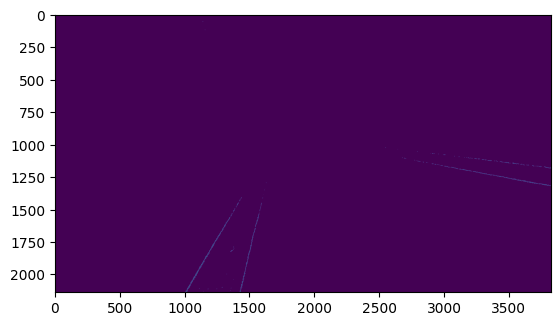

In [5]:
lines = lane_detection.detect_lines(img, 49, 50, 3, 500, 40)
print(lines)

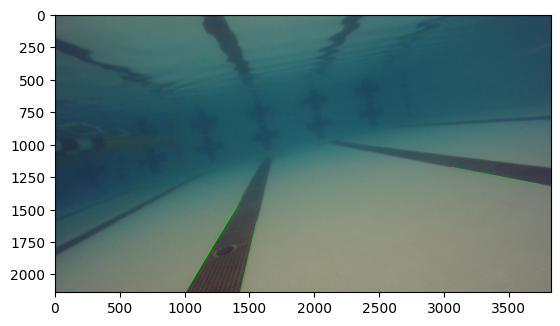

In [6]:
lane_detection.draw_lines(img, lines)

In [7]:
lane_detection.get_slopes_intercepts(lines)

([0.1943620178041543,
  -1.664819944598338,
  -1.6640826873385013,
  -1.664850136239782,
  -4.333333333333333],
 [8104.427480916031,
  987.5374376039933,
  989.1739130434783,
  985.5122749590835,
  1420.7692307692307])

In [8]:
lanes = lane_detection.detect_lanes(lines)
print(lanes)


slopeList:[0.1943620178041543, -1.664819944598338, -1.6640826873385013, -1.664850136239782, -4.333333333333333]
xInterceptList:[8104.427480916031, 987.5374376039933, 989.1739130434783, 985.5122749590835, 1420.7692307692307]
DistREQ:7116.890043312037
slopeREQ:5.745703725343258
DistREQ:7115.253567872553
slopeREQ:5.745969844957565
DistREQ:7118.915205956947
slopeREQ:5.745692832423384
DistREQ:6683.6582501468
slopeREQ:5.3758073987081625
DistREQ:1.6364754394849115
slopeREQ:0.00026611961430744735
DistREQ:2.0251626449098694
slopeREQ:1.0892919874438967e-05
DistREQ:433.2317931652374
slopeREQ:0.36989632663509536
DistREQ:3.661638084394781
slopeREQ:0.0002770125341818863
DistREQ:431.59531772575247
slopeREQ:0.3701624462494028
DistREQ:435.25695581014725
slopeREQ:0.3698854337152209
[[[987.5374376039933, 2160, -2706.194174756933, 8309.398058251847], [989.1739130434783, 2160, -2706.194174756933, 8309.398058251847]], [[987.5374376039933, 2160, -110685.50000016436, 188075.50000027366], [985.5122749590835, 2

In [9]:
image = cv2.imread(IMAGE_FILE)

type(x1)
[987.5374376039933, 2160, -2706.194174756933, 8309.398058251847]
type(x1)
[989.1739130434783, 2160, -2706.194174756933, 8309.398058251847]
type(x1)
[987.5374376039933, 2160, -110685.50000016436, 188075.50000027366]
type(x1)
[985.5122749590835, 2160, -110685.50000016436, 188075.50000027366]
type(x1)
[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903]
type(x1)
[1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]
type(x1)
[989.1739130434783, 2160, -6954.128440366562, 15378.311926604822]
type(x1)
[985.5122749590835, 2160, -6954.128440366562, 15378.311926604822]
type(x1)
[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673]
type(x1)
[1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]
type(x1)
[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635]
type(x1)
[1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]
type(x1)
[987.5374376039933, 2160, -2706.194174756933, 8309.398058251847]
type(x1)
[989.1739130434783, 21

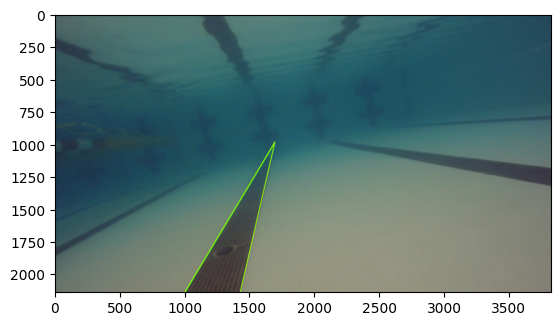

In [10]:
lane_detection.draw_lanes(image, lanes)
plt.imshow(cv2.cvtColor(lane_detection.draw_lanes(image, lanes), cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
#new_image = lane_detection.literallyEverything(img, 50, 90, 3, 10)

In [12]:
#plt.imshow(cv2.cvtColor(lane_detection.literallyEverything(cv2.imread(IMAGE_FILE)), cv2.COLOR_BGR2RGB))

In [13]:
#lane_detection.draw_lines(img, lines)

In [ ]:
video = cv2.VideoCapture('AUV_Vid.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
while ret:
    slopeSet = set() 
    ret, frame = video.read()
    lines = detect_lines(frame, 50, 90, 3,150,10)
    print (lines)
    
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
    try:
        lanes = detect_lanes(lines)
        print ("tried to detect lanes")
        pickedLane = pick_lane(lanes)
        frame = draw_Single_lane(frame, pickedLane, (255, 0, 0))
        frame = draw_lines(frame, lines,(0, 255, 0))
        center_intercept, center_slope = get_lane_center(pickedLane)
        xPoint = pickedLane[0][2]
        yPoint = pickedLane[0][3]
        cv2.line(frame, (int(center_intercept), 1080), (int(xPoint), int(yPoint)), (0,0,255), 3)

        output_video.write(frame)
    except:
        pass
        
        
    recommend_direction(center_intercept, center_slope)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

video.release()
output_video.release()